In [229]:
from math import *
import numpy as np
from qutip import *
from qutip import bloch
import matplotlib.pyplot as plt
from scipy.linalg import expm, fractional_matrix_power
import cmath

#########################################################################

# pauli matrix 
sx = np.array([[0,  1],     [1, 0]])
sy = np.array([[0, -1j],   [1j, 0]])
sz = np.array([[1, 0],     [0, -1]])
s0 = np.array([[1, 0],      [0, 1]])

# parameters(detuning factor)
v0 = 0.02           # Arbitrary settings, Actual speed : 0.04rad/μs
d0 = 0.15           # Arbitrary settings, Actual speed : 0.30rad/μs


# unitary operator
def unitary(dt, choice):
    
    # Select x,y-rotation direction.
    # [stay, +x, -x, +y, -y]
    choice_list = [0, 1, -1, 1, -1] 
    
    if choice < 3:
        # if choice = 0 ... only d0*sz
        Ham = (d0*sz+v0*choice_list[choice]*sx)
    else:
        Ham = (d0*sz+v0*choice_list[choice]*sy)

    # Creating a Unitary Operator for each of the four sections by Hamiltonian
    eigvals = np.linalg.eigh(Ham)[0]
    eigvecs = 1*np.linalg.eigh(Ham)[1]
    E = np.diag(eigvals)
    U_H = eigvecs.conj().T
    U_e = U_H.conj().T @ expm(-1j*E*dt) @ U_H
    
    return U_e


#########################################################################

# x-rotation operater
def Rx(theta):
    return np.matrix([  [cos(theta/2),    -1j*sin(theta/2)],
                        [-1j*sin(theta/2),    cos(theta/2)]])

# z-rotation operater
# Do not use Rz. Control by rotation only by Hamiltonian.
def Rz(phi): 
    return np.matrix([  [cos(phi/2)-1j*sin(phi/2),  0],
                        [0,  cos(phi/2)+1j*sin(phi/2)]])

# Calculating the Fidelity
def state_fidelity(rho_1, rho_2): 
    
    # rho_1(current state), rho_2(target state)
    # Calculate the fidelity after checking the dimensions of the two states.
    
    if np.shape(rho_1) != np.shape(rho_2):
            print("Dimensions of two states do not match.")
            return 0
    else:
        sqrt_rho_1 = fractional_matrix_power(rho_1, 1 / 2)
        fidelity = np.trace(fractional_matrix_power(sqrt_rho_1 @ rho_2 @ sqrt_rho_1, 1 / 2)) ** 2
        return np.real(fidelity)


#########################################################################

In [230]:
# dt = 2.6
# target_theta, target_phi = 2.4241177960054614, 1.4388044532389939
# combi = [1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 3, 3]
dt = 2.6
target_theta = 1.7546116456193512
target_phi = 4.287738190571398
target_omega = 0.5850123215656255
combi = [3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3]

print(len(combi))
print(dt*len(combi))

18
46.800000000000004


In [231]:

import pennylane as qml

# Use the mixed state simulator to save some steps in plotting later
# default.qubit < default.mixed
dev = qml.device('default.mixed', wires=1)

@qml.qnode(dev)
def haar_random_unitary(phi, theta, omega):
    qml.Rot(phi, theta, omega, wires=0)
    return qml.density_matrix(wires=0)

In [232]:
init_wave = np.array([[1], [0]])
irho_init = np.kron(init_wave,init_wave.conj().T)

# target_U = Rz(target_phi) @ Rx(target_theta)
# irho_target = target_U @ irho_init @target_U.conj().T

irho_target = haar_random_unitary(target_phi, target_theta, target_omega)

# 중첩에서 시작할때 필요한 코드
# irho_init = Rx(pi/2) @ irho_init @Rx(pi/2).conj().T

In [233]:
k = 50
combination = []

for i in combi :
    combination += [i for j in range(k)]

print(combination)

dt = dt/k

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

[0.002079914136444701, 1.622366513073733e-05, 0.9999978368446486]
0.4094660488212647
[0.0041593131170778565, 6.489064222470832e-05, 0.9999913479143688]
0.41033204869384005
[0.00623768191368238, 0.00014598887738235964, 0.9999805348163473]
0.41120683138314656
[0.008314505753198488, 0.0002594982840883802, 0.9999654002287858]
0.4120901793399236
[0.010389270245223363, 0.0004053907481867551, 0.9999459479002388]
0.41298185335084536
[0.012461461509416022, 0.0005836301348441163, 0.9999221826486839]
0.41388166109262947
[0.014530566302775865, 0.0007941722974996639, 0.9998941103603292]
0.4147893630916841
[0.016596072146763365, 0.0010369650887994443, 0.9998617379881553]
0.4157047296173946
[0.018657467454231406, 0.0013119483735122726, 0.999825073550193]
0.4166275565992703
[0.020714241656135855, 0.0016190540434241059, 0.9997841261275376]
0.4175575844937703
[0.02276588532799395, 0.0019582060342071715, 0.9997389058620992]
0.41849460087019497
[0.024811890316059227, 0.002329320344259679, 0.99968942395409

0.4707528549802585
[0.11172570027919729, 0.061021874266113954, 0.9918637500978146]
0.4717057659354769
[0.1128229535899093, 0.06277338991865938, 0.9916302146774747]
0.47265225889995743
[0.11389226276619828, 0.0645418051074203, 0.9913944259856393]
0.4735920792476202
[0.11493336296019048, 0.06632668182904564, 0.9911564424227555]
0.4745250141299347
[0.11594599631084929, 0.06812757800297065, 0.9909163229328982]
0.4754508232155494
[0.11692991200784245, 0.06994404758091204, 0.990674126989172]
0.47636929470765454
[0.11788486635366323, 0.07177564065734574, 0.9904299145789803]
0.477280164069548
[0.11881062282398956, 0.0736219035809401, 0.9901837461891672]
0.47818323867021206
[0.11970695212626684, 0.07548237906691685, 0.9899356827910364]
0.47907828939768077
[0.12057363225649927, 0.07735660631031195, 0.9896857858252498]
0.47996508309755476
[0.12141044855423624, 0.0792441211001084, 0.9894341171866098]
0.4808434124435266
[0.12221719375573958, 0.08114445593421254, 0.9891807392087286]
0.48171304215456

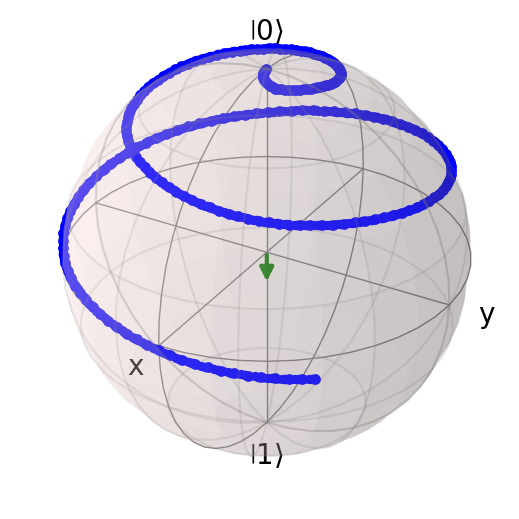

In [234]:
b = Bloch()
irho_mid = np.matrix(irho_init)
point_list = []
z = []
y = []

for i in combination:
    instant_U = unitary(dt, i)
    irho_mid = (instant_U @ irho_mid @ instant_U.conj().T)
    point = [np.trace(irho_mid * sx).real,
             np.trace(irho_mid * sy).real,
             np.trace(irho_mid * sz).real]
    b.add_points(point, 'm')
    print(point)
    z.append(np.trace(irho_mid * sz).real)
    y.append(np.trace(irho_mid * sy).real)
    point_list.append(point)
    print(state_fidelity(irho_target, irho_mid))

vector = np.array([np.trace(irho_target * sx).real,
             np.trace(irho_target * sy).real,
             np.trace(irho_target * sz).real])

print(state_fidelity(irho_target, irho_mid))
print(vector)

b.vector_color=['g']
b.add_vectors(vector)
# b.vector_color=['g']
#b.add_vectors([0,0,1],colors = 'r')
b.point_marker = ['o']
b.show()

In [235]:
state_fidelity(irho_mid, irho_target)

0.9921654936632492